# Imports

In [14]:
import pandas as pd

# Handwritten local modules
from mya_utils import BUSCO_MAMMALIA_SPECIES


In [11]:
# from plot_constants import PROTEIN_COLOR, DAYHOFF_COLOR, MOLTYPE_PALETTE, MOLTYPE_ORDER, ALPHABET_KSIZES, ALPHABET_PALETTES

In [18]:
FIGURE_FOLDER = '../figures'

# Analyze protien-coding classification metrics

## Get k-mer complexity per species

In [17]:
kmer_complexity = pd.read_csv('busco_mammalia_kmer_complexity.csv')
kmer_complexity['moltype'] = kmer_complexity.molecule.str.strip('0123456789')
kmer_complexity = kmer_complexity.join(BUSCO_MAMMALIA_SPECIES, on='name')
kmer_complexity

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,moltype,common_name,scientific_name,mya
0,tupaia_chinensis,dayhoff6,17,6,6.506573e-10,506371,13.228571,5.704469,-7.524102,dayhoff,tupaia,Tupaia chinensis,82.0
1,tupaia_chinensis,protein20,8,20,7.144468e-10,518316,10.408240,5.714595,-4.693645,protein,tupaia,Tupaia chinensis,82.0
2,camelus_bactrianus,dayhoff6,17,6,2.747611e-21,724,13.228571,2.859739,-10.368833,dayhoff,camel,Camelus bactrianus,96.0
3,camelus_bactrianus,protein20,8,20,3.197955e-21,752,10.408240,2.876218,-7.532022,protein,camel,Camelus bactrianus,96.0
4,mus_musculus,dayhoff6,17,6,7.880357e-06,5443866,13.228571,6.735907,-6.492664,dayhoff,house mouse,Mus musculus,90.0
5,mus_musculus,protein20,8,20,8.231361e-06,5505061,10.408240,6.740762,-3.667478,protein,house mouse,Mus musculus,90.0
6,lipotes_vexillifer,dayhoff6,17,6,1.911689e-19,2091,13.228571,3.320354,-9.908217,dayhoff,baiji,Lipotes vexillifer,96.0
7,lipotes_vexillifer,protein20,8,20,2.188906e-19,2163,10.408240,3.335057,-7.073183,protein,baiji,Lipotes vexillifer,96.0
8,capra_hircus,dayhoff6,17,6,3.281257e-13,75724,13.228571,4.879234,-8.349338,dayhoff,goat,Capra hircus,96.0
9,capra_hircus,protein20,8,20,3.585962e-13,77413,10.408240,4.888814,-5.519426,protein,goat,Capra hircus,96.0


## Get number of protein sequences per species

In [18]:
proteome_folder = '/home/olga/data_lg/czbiohub-reference/uniprot/releases/2019_11/manually_downloaded/mammalia_busco_subsets'

col = 'proteome_size'
busco_mammalia_species[col] = 0
for fasta in glob.glob(os.path.join(proteome_folder, '*.fasta')):
    species_lower = os.path.basename(fasta).split('__')[-1].split('.')[0]
    proteome_size = sum(1 for _ in screed.open(fasta))
    
    busco_mammalia_species.loc[species_lower, col] = proteome_size 
busco_mammalia_species = busco_mammalia_species.sort_values('mya')
describe(busco_mammalia_species)


(18, 4)
--- First 5 entries ---


,common_name,scientific_name,mya,proteome_size
scientific_lower,,,,
homo_sapiens,human,Homo sapiens,0.0,15066
macaca_mulatta,macaque,Macaca mulatta,29.4,5008
aotus_nancymaae,night monkey,Aotus nancymaae,43.2,7261
tupaia_chinensis,tupaia,Tupaia chinensis,82.0,1338
mus_musculus,house mouse,Mus musculus,90.0,14519


# SFig 1A


### Plot proteome sizes

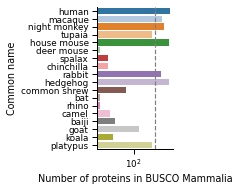

In [19]:
# fig, ax = plt.subplots(figsize=(2.75, 2.5))
g = sns.catplot(
    data=busco_mammalia_species,
    y='common_name',
    x='proteome_size',
    palette='tab20',
    kind='bar',
    order=distance_from_human_mya.index,
    height=2.5
#     order=
)
# sns.despine()
g.set(xscale='log', xlabel='Number of proteins in BUSCO Mammalia', ylabel='Common name')
for ax in g.axes.flat:
    ax.axvline(2e3, linestyle='--', color='grey')

pdf = os.path.join(FIGURE_FOLDER, 'orpheum_translate__proteome_size_barplots.pdf')
g.savefig(pdf)

### Plot proteome sizes vs mya

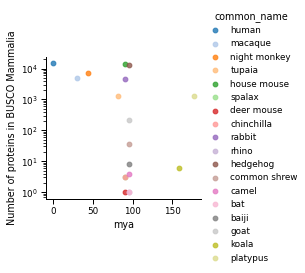

In [20]:
# fig, ax = plt.subplots()
g = sns.lmplot(
    data=busco_mammalia_species,
    x='mya',
    y='proteome_size',
    hue='common_name',
    palette='tab20',
    fit_reg=False,
    height=2.5,
    aspect=1.25
#     yscale='log'
#     order=
)
g.set(yscale='log', ylabel='Number of proteins in BUSCO Mammalia')
pdf = os.path.join(FIGURE_FOLDER, 'orphuem_translate__mya_vs_proteome_size.pdf')
g.savefig(pdf)

In [21]:
busco_mammalia_species.query('proteome_size > 1000').mya.value_counts()

90.0     2
43.2     1
29.4     1
177.0    1
96.0     1
82.0     1
0.0      1
Name: mya, dtype: int64

In [22]:
busco_mammalia_common = busco_mammalia_species.reset_index().set_index('common_name')
describe(busco_mammalia_common)

(18, 4)
--- First 5 entries ---


,scientific_lower,scientific_name,mya,proteome_size
common_name,,,,
human,homo_sapiens,Homo sapiens,0.0,15066
macaque,macaca_mulatta,Macaca mulatta,29.4,5008
night monkey,aotus_nancymaae,Aotus nancymaae,43.2,7261
tupaia,tupaia_chinensis,Tupaia chinensis,82.0,1338
house mouse,mus_musculus,Mus musculus,90.0,14519


In [23]:
print(busco_mammalia_species.to_csv(sep='\t'))

scientific_lower	common_name	scientific_name	mya	proteome_size
homo_sapiens	human	Homo sapiens	0.0	15066
macaca_mulatta	macaque	Macaca mulatta	29.4	5008
aotus_nancymaae	night monkey	Aotus nancymaae	43.2	7261
tupaia_chinensis	tupaia	Tupaia chinensis	82.0	1338
mus_musculus	house mouse	Mus musculus	90.0	14519
nannospalax_galili	spalax	Nannospalax galili	90.0	3
peromyscus_maniculatus_bairdii	deer mouse	Peromyscus Maniculatus bairdii	90.0	1
chinchilla_lanigera	chinchilla	Chinchilla lanigera	90.0	3
oryctolagus_cuniculus	rabbit	Oryctolagus cuniculus	90.0	4424
ceratotherium_simum_simum	rhino	Ceratotherium simum simum	96.0	1
erinaceus_europaeus	hedgehog	Erinaceus europaeus	96.0	13448
sorex_araneus	common shrew	Sorex araneus	96.0	36
camelus_bactrianus	camel	Camelus bactrianus	96.0	4
rhinolophus_sinicus	bat	Rhinolophus sinicus	96.0	1
lipotes_vexillifer	baiji	Lipotes vexillifer	96.0	8
capra_hircus	goat	Capra hircus	96.0	213
phascolarctos_cinereus	koala	Phascolarctos cinereus	159.0	6
ornithorhynchu

## Read scikit-learn metrics

In [24]:
alphabet_to_size = {
    'protein': 20,
    'dayhoff': 6
}

In [25]:
csv = '/home/olga/data_sm/immune-evolution/pipeline-results/human-simulated/combined-across-species/busco_mammalia_coding_scores_metrics.csv'
combined_metrics = pd.read_csv(csv)
combined_metrics.species = combined_metrics.species.map(clean_common_names_of_species)
combined_metrics['proteome'] = combined_metrics['species']
combined_metrics = combined_metrics.join(busco_mammalia_common, on='species')
combined_metrics['alphabet_ksize'] = combined_metrics.apply(
    lambda x: f'{x.alphabet} ({alphabet_to_size[x.alphabet]}-letter), ksize = {x.ksize}',
    axis=1
)
describe(combined_metrics)

(6804, 11)
--- First 5 entries ---


,species,alphabet,ksize,score_value,score_name,proteome,scientific_lower,scientific_name,mya,proteome_size,alphabet_ksize
0,baiji,dayhoff,5,0.004769,f1_score,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8,"dayhoff (6-letter), ksize = 5"
1,baiji,dayhoff,6,0.000085,f1_score,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8,"dayhoff (6-letter), ksize = 6"
2,baiji,dayhoff,7,0.000055,f1_score,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8,"dayhoff (6-letter), ksize = 7"
3,baiji,dayhoff,8,0.000055,f1_score,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8,"dayhoff (6-letter), ksize = 8"
4,baiji,dayhoff,9,0.000055,f1_score,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8,"dayhoff (6-letter), ksize = 9"


## Plot metrics

In [26]:
species_color_kwargs = dict(
    hue='species',
    hue_order=distance_from_human_mya.index,
    palette='viridis'
)

In [27]:
# sns.catplot(x='ksize', 
#             y='score_value', 
#             col='alphabet', 
#             row='score_name',
#             data=combined_metrics, kind='point', 
#             aspect=1.5,
#             **species_color_kwargs)

## Join metrics with millions of years


In [28]:
distance_from_human_mya.name = 'mya'

In [29]:
# combined_metrics_mya = combined_metrics.join(distance_from_human_mya, on='species')
# combined_metrics_mya.head()

## MYA vs classification - only ksizes relevant to protein

In [30]:
subset_score_names = 'precision_score', 'recall_score', 'f_12_score'
combined_metrics_mya_protein_ksize_precision_recall_f12 = combined_metrics.query(
    '(ksize <= 10) and (alphabet == "protein") '
    'and (score_name in @subset_score_names)'
    ' and proteome_size > 2500'
)
describe(combined_metrics_mya_protein_ksize_precision_recall_f12)


(108, 11)
--- First 5 entries ---


,species,alphabet,ksize,score_value,score_name,proteome,scientific_lower,scientific_name,mya,proteome_size,alphabet_ksize
3267,hedgehog,protein,5,0.714444,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"protein (20-letter), ksize = 5"
3268,hedgehog,protein,6,0.999495,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"protein (20-letter), ksize = 6"
3269,hedgehog,protein,7,1.000000,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"protein (20-letter), ksize = 7"
3270,hedgehog,protein,8,1.000000,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"protein (20-letter), ksize = 8"
3271,hedgehog,protein,9,1.000000,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"protein (20-letter), ksize = 9"


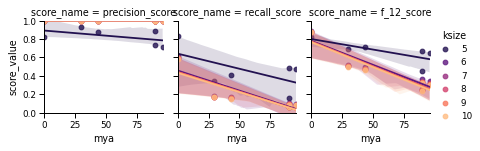

In [31]:
g = sns.lmplot(
    x='mya',
    y='score_value',
    col='score_name',
#     row='alphabet',
#     col_wrap=2,
    data=combined_metrics_mya_protein_ksize_precision_recall_f12,
    hue='ksize',
    palette='magma',
    height=2,
#     aspect=1.5,
#     margin_titles=True
)
g.set(ylim=(0, 1))

## MYA vs classification - only ksizes relevant to dayhoff

In [32]:
subset_score_names = 'precision_score', 'recall_score', 'f_12_score'
combined_metrics_mya_dayhoff_ksize_precision_recall_f12 = combined_metrics.query(
    '((ksize >= 15) or (ksize <= 20)) and (alphabet == "dayhoff") '
    'and (score_name in @subset_score_names) '
    'and (proteome_size > 1000)'
)
describe(combined_metrics_mya_dayhoff_ksize_precision_recall_f12)


(648, 11)
--- First 5 entries ---


,species,alphabet,ksize,score_value,score_name,proteome,scientific_lower,scientific_name,mya,proteome_size,alphabet_ksize
3240,hedgehog,dayhoff,5,0.478834,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"dayhoff (6-letter), ksize = 5"
3241,hedgehog,dayhoff,6,0.481325,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"dayhoff (6-letter), ksize = 6"
3242,hedgehog,dayhoff,7,0.496913,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"dayhoff (6-letter), ksize = 7"
3243,hedgehog,dayhoff,8,0.555418,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"dayhoff (6-letter), ksize = 8"
3244,hedgehog,dayhoff,9,0.663767,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"dayhoff (6-letter), ksize = 9"


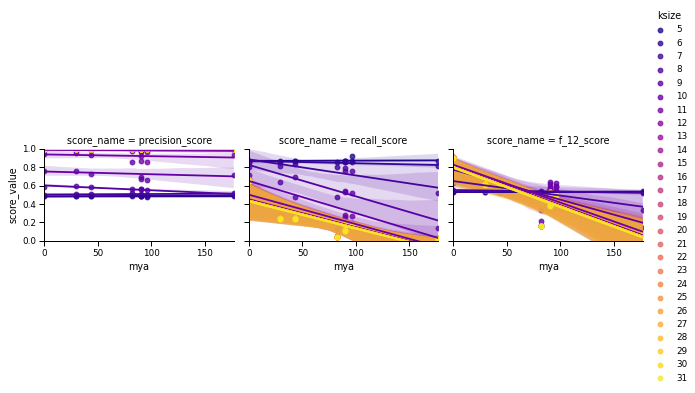

In [33]:
g = sns.lmplot(
    x='mya',
    y='score_value',
    col='score_name',
#     row='alphabet',
#     col_wrap=2,
    data=combined_metrics_mya_dayhoff_ksize_precision_recall_f12,
    hue='ksize',
    palette='plasma',
    height=2,
    aspect=1.5,
#     margin_titles=True
)
g.set(ylim=(0, 1))

### Subset to k=8

In [34]:
combined_metrics_k8 = combined_metrics.query('ksize == 8')
describe(combined_metrics_k8)

(252, 11)
--- First 5 entries ---


,species,alphabet,ksize,score_value,score_name,proteome,scientific_lower,scientific_name,mya,proteome_size,alphabet_ksize
3,baiji,dayhoff,8,0.000055,f1_score,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8,"dayhoff (6-letter), ksize = 8"
30,baiji,protein,8,0.000018,f1_score,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8,"protein (20-letter), ksize = 8"
57,bat,dayhoff,8,0.000000,f1_score,bat,rhinolophus_sinicus,Rhinolophus sinicus,96.0,1,"dayhoff (6-letter), ksize = 8"
84,bat,protein,8,0.000000,f1_score,bat,rhinolophus_sinicus,Rhinolophus sinicus,96.0,1,"protein (20-letter), ksize = 8"
111,camel,dayhoff,8,0.000018,f1_score,camel,camelus_bactrianus,Camelus bactrianus,96.0,4,"dayhoff (6-letter), ksize = 8"


## Protein k8 Plot by MYA from human

In [35]:
subset_score_names

('precision_score', 'recall_score', 'f_12_score')

In [36]:
precision_recall_score_names =  'precision_score', 'recall_score'

In [38]:
combined_metrics_precision_recall = combined_metrics.query(
    '(score_name in @precision_recall_score_names) and '
    '(((alphabet == "protein") and (ksize == 8)) or '
    '((alphabet == "dayhoff") and (ksize == 17))) '
    ' and proteome_size > 4000'
)
describe(combined_metrics_precision_recall)

(24, 11)
--- First 5 entries ---


,species,alphabet,ksize,score_value,score_name,proteome,scientific_lower,scientific_name,mya,proteome_size,alphabet_ksize
3252,hedgehog,dayhoff,17,0.999678,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"dayhoff (6-letter), ksize = 17"
3270,hedgehog,protein,8,1.000000,precision_score,hedgehog,erinaceus_europaeus,Erinaceus europaeus,96.0,13448,"protein (20-letter), ksize = 8"
3306,human,dayhoff,17,0.998971,precision_score,human,homo_sapiens,Homo sapiens,0.0,15066,"dayhoff (6-letter), ksize = 17"
3324,human,protein,8,0.999017,precision_score,human,homo_sapiens,Homo sapiens,0.0,15066,"protein (20-letter), ksize = 8"
3414,macaque,dayhoff,17,0.999666,precision_score,macaque,macaca_mulatta,Macaca mulatta,29.4,5008,"dayhoff (6-letter), ksize = 17"


# Fig 2E, F

## @paper - precision, recall F1 for best ksizes of dayhoff and protein

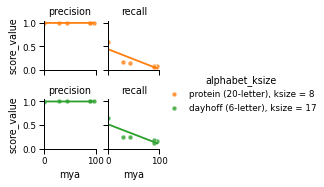

In [39]:
g = sns.lmplot(
    data=combined_metrics_precision_recall,
    x='mya',
    y='score_value',
    col='score_name',
#     col_wrap=3,
    row='alphabet',
    row_order=['protein', 'dayhoff'],
    height=1.25,
    hue='alphabet_ksize',
#     lowess=True,
    scatter_kws=dict(linewidth=.5,edgecolor='white'),
    ci=False,
    hue_order=['protein (20-letter), ksize = 8', 'dayhoff (6-letter), ksize = 17'],
    palette=[protein_color, dayhoff_color]
)
g.set_titles('{col_name}')
g.set(ylim=(0, 1.05), yticks=[0, 0.5, 1], xlim=(0, 100))
g.set_xlabels('mya')
for ax in g.axes.flat:
    title = ax.get_title()
    new_title = title.split('_score')[0]
    ax.set(title=new_title)

pdf = os.path.join(FIGURE_FOLDER, 'orpheum_translate__human_mouse__precision_recall_f12__protein-k8__dayhoff-k17.pdf')
g.savefig(pdf)

## Read ROC AUC csv

In [40]:
# locals()

In [41]:
csv = '/home/olga/data_sm/immune-evolution/pipeline-results/human-simulated/combined-across-species/busco_mammalia_coding_scores_roc_auc_score.csv'


combined_roc_auc_score = pd.read_csv(csv)
# combined_roc_auc_score = combined_roc_auc_score.join(distance_from_human_mya, on='species') 

combined_roc_auc_score.species = combined_roc_auc_score.species.map(clean_common_names_of_species)
# Everything decreases after k > 21
combined_roc_auc_score = combined_roc_auc_score.query('ksize <= 21')
combined_roc_auc_score = combined_roc_auc_score.join(
    busco_mammalia_common, on='species')
combined_roc_auc_score.head()


,species,alphabet,ksize,score_value,score_name,scientific_lower,scientific_name,mya,proteome_size
0,baiji,dayhoff,5,0.397805,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8
1,baiji,dayhoff,6,0.363173,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8
2,baiji,dayhoff,7,0.363950,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8
3,baiji,dayhoff,8,0.385517,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8
4,baiji,dayhoff,9,0.418185,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8


In [42]:
max_roc_scores = combined_roc_auc_score.groupby(
    ['species', 'alphabet']).score_value.max()
max_roc_scores.name = 'max_roc_auc'
max_roc_scores = max_roc_scores.reset_index()
max_roc_scores = max_roc_scores.join(busco_mammalia_common, on='species')
describe(max_roc_scores)

(36, 7)
--- First 5 entries ---


,species,alphabet,max_roc_auc,scientific_lower,scientific_name,mya,proteome_size
0,baiji,dayhoff,0.500255,lipotes_vexillifer,Lipotes vexillifer,96.0,8
1,baiji,protein,0.500607,lipotes_vexillifer,Lipotes vexillifer,96.0,8
2,bat,dayhoff,0.552860,rhinolophus_sinicus,Rhinolophus sinicus,96.0,1
3,bat,protein,0.503737,rhinolophus_sinicus,Rhinolophus sinicus,96.0,1
4,camel,dayhoff,0.500110,camelus_bactrianus,Camelus bactrianus,96.0,4


In [43]:
max_roc_scores.query('max_roc_auc > 0.6')

,species,alphabet,max_roc_auc,scientific_lower,scientific_name,mya,proteome_size
14,hedgehog,dayhoff,0.869341,erinaceus_europaeus,Erinaceus europaeus,96.0,13448
15,hedgehog,protein,0.929230,erinaceus_europaeus,Erinaceus europaeus,96.0,13448
16,house mouse,dayhoff,0.880976,mus_musculus,Mus musculus,90.0,14519
17,house mouse,protein,0.938552,mus_musculus,Mus musculus,90.0,14519
18,human,dayhoff,0.996881,homo_sapiens,Homo sapiens,0.0,15066
19,human,protein,0.998456,homo_sapiens,Homo sapiens,0.0,15066
22,macaque,dayhoff,0.770334,macaca_mulatta,Macaca mulatta,29.4,5008
23,macaque,protein,0.789053,macaca_mulatta,Macaca mulatta,29.4,5008
24,night monkey,dayhoff,0.818646,aotus_nancymaae,Aotus nancymaae,43.2,7261
25,night monkey,protein,0.844914,aotus_nancymaae,Aotus nancymaae,43.2,7261


In [44]:
max_roc_scores.proteome_size.max()

15066

In [45]:
mya_order = sorted(distance_from_human_mya.unique())
mya_color_kwargs = dict(
        hue='mya',
    hue_order=mya_order,
    palette='cividis',
)

In [46]:
distance_from_human_mya

human             0.0
macaque          29.4
night monkey     43.2
tupaia           82.0
house mouse      90.0
deer mouse       90.0
spalax           90.0
chinchilla       90.0
rabbit           90.0
hedgehog         96.0
common shrew     96.0
bat              96.0
rhino            96.0
camel            96.0
baiji            96.0
goat             96.0
koala           159.0
platypus        177.0
Name: mya, dtype: float64

# SFig 1G

### @paper - proteome size vs max ROC AUC

/home/olga/anaconda/envs/immune-evolution/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


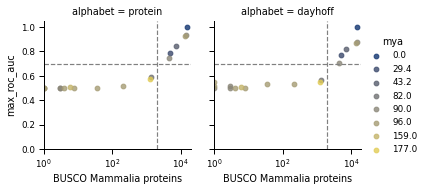

In [78]:
g = sns.lmplot(
    x='proteome_size',
    y='max_roc_auc',
    col='alphabet',
    col_order=['protein', 'dayhoff'],
    data=max_roc_scores,
    height=2.5,
    fit_reg=False,
    **mya_color_kwargs
)
g.set(ylim=(0, 1.05), xlim=(-10, 2e4), xlabel='BUSCO Mammalia proteins', xscale='log')
for ax in g.axes.flat:
    ax.axhline(0.7, linestyle='--', color='grey')
    ax.axvline(2000, linestyle='--', color='grey')
pdf = os.path.join(
    FIGURE_FOLDER, 
    'orpheum_translate__proteome_size_vs_max_roc_auc.pdf'
)
g.savefig(pdf)

# Fig 2C,D

### @paper Plot ROC AUC showing argmax for each divergence time -- both protein and dayhoff

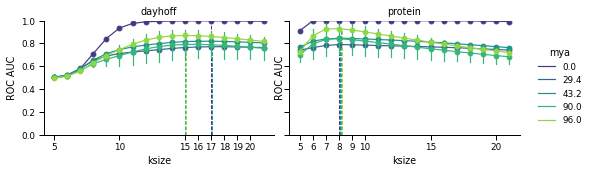

In [50]:
n_lines_plotted = defaultdict(int)
def plot_argmax(x, y, *args, **kwargs):
    idxmax = y.idxmax()
    
    global n_lines_plotted
    
    true_x = x[idxmax]
    adjusted_x = true_x + n_lines_plotted[true_x]/20
    
    plt.vlines(
        adjusted_x, 
        0, 
        y.max(),        
        linestyle='--',
        linewidth=1,
        *args, 
        **kwargs
    )
    n_lines_plotted[true_x] += 1
#     print('x:', x)
#     print('y:', y)
#     print('args:', args)
#     print('kwargs:', kwargs)
    pass

def pointplot_like(x, y, *args, **kwargs):
    """Like a pointplot, but x is true values not categorical"""
#     print('x:', x)
#     print('y:', y)
#     print('args:', args)
#     print('kwargs:', kwargs)
    
    
    new_y = y.groupby(x).mean()
    new_x = x.unique()
    plt.plot(new_x, new_y, 'o-', *args, **kwargs)
    
    y_stds = y.groupby(x).std()
    
    for x_pos, y_mean, y_sd in zip(new_x, new_y, y_stds):

        plt.plot([x_pos, x_pos], [y_mean - y_sd, y_mean + y_sd], *args, **kwargs)
    
    pass



data  = combined_roc_auc_score.query('proteome_size > 2500')


g = sns.FacetGrid(
    data=data, 
    height=2.5, aspect=1.5,
    col='alphabet',
    sharex=False,
    hue='mya',
    palette='viridis',
    hue_order=sorted(data['mya'].unique())
)
# g.map(sns.scatterplot, 'ksize', 'score_value')
g.map(pointplot_like, 'ksize', 'score_value')
g.add_legend()
g.map(plot_argmax, 'ksize', 'score_value')
g.set(ylabel='ROC AUC', 
      ylim=(0, 1), 
#       xticks=[5, 6, 7, 8, 9, 10, 15, 20]
     )
for ax in g.axes.flat:
    if 'protein' in ax.get_title():
        ax.set(xticks=[5, 6, 7, 8, 9, 10, 15, 20])
    else:
        ax.set(xticks=[5, 10, 15, 16, 17, 18, 19, 20])

g.set_titles('{col_name}')
pdf = os.path.join(
    FIGURE_FOLDER, 
    'leaftea_translate__human_mouse__roc_auc__protein_dayhoff.pdf')
g.savefig(pdf)

In [51]:
combined_roc_auc_score_dayhoff17_protein8 = combined_roc_auc_score.query('(alphabet == "dayhoff" and ksize == 17) or (alphabet == "protein" and ksize == 8)')
describe(combined_roc_auc_score_dayhoff17_protein8)

(36, 9)
--- First 5 entries ---


,species,alphabet,ksize,score_value,score_name,scientific_lower,scientific_name,mya,proteome_size
12,baiji,dayhoff,17,0.499700,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8
30,baiji,protein,8,0.500530,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8
66,bat,dayhoff,17,0.499999,roc_auc,rhinolophus_sinicus,Rhinolophus sinicus,96.0,1
84,bat,protein,8,0.500009,roc_auc,rhinolophus_sinicus,Rhinolophus sinicus,96.0,1
120,camel,dayhoff,17,0.500095,roc_auc,camelus_bactrianus,Camelus bactrianus,96.0,4


In [52]:
combined_roc_auc_score_dayhoff17_protein8.query('proteome_size > 2000').groupby(['alphabet', 'mya']).score_value.mean()

alphabet  mya 
dayhoff   0.0     0.996881
          29.4    0.770334
          43.2    0.818646
          90.0    0.787676
          96.0    0.860161
protein   0.0     0.998456
          29.4    0.789053
          43.2    0.844914
          90.0    0.840868
          96.0    0.929230
Name: score_value, dtype: float64

### @paper plot correlation of proteom size to ROC auc

In [53]:
kmer_complexity.head()

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,moltype,common_name,scientific_name,mya
0,tupaia_chinensis,dayhoff6,17,6,6.506573e-10,506371,13.228571,5.704469,-7.524102,dayhoff,tupaia,Tupaia chinensis,82.0
1,tupaia_chinensis,protein20,8,20,7.144468e-10,518316,10.408240,5.714595,-4.693645,protein,tupaia,Tupaia chinensis,82.0
2,camelus_bactrianus,dayhoff6,17,6,2.747611e-21,724,13.228571,2.859739,-10.368833,dayhoff,camel,Camelus bactrianus,96.0
3,camelus_bactrianus,protein20,8,20,3.197955e-21,752,10.408240,2.876218,-7.532022,protein,camel,Camelus bactrianus,96.0
4,mus_musculus,dayhoff6,17,6,7.880357e-06,5443866,13.228571,6.735907,-6.492664,dayhoff,house mouse,Mus musculus,90.0


In [54]:
combined_roc_auc_score_dayhoff17_protein8.head()

,species,alphabet,ksize,score_value,score_name,scientific_lower,scientific_name,mya,proteome_size
12,baiji,dayhoff,17,0.499700,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8
30,baiji,protein,8,0.500530,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8
66,bat,dayhoff,17,0.499999,roc_auc,rhinolophus_sinicus,Rhinolophus sinicus,96.0,1
84,bat,protein,8,0.500009,roc_auc,rhinolophus_sinicus,Rhinolophus sinicus,96.0,1
120,camel,dayhoff,17,0.500095,roc_auc,camelus_bactrianus,Camelus bactrianus,96.0,4


In [55]:
combined_roc_auc_score_dayhoff17_protein8_corr = combined_roc_auc_score_dayhoff17_protein8.groupby('alphabet').corr(method='spearman')
combined_roc_auc_score_dayhoff17_protein8_corr

ksize  score_value       mya  proteome_size
alphabet                                                           
dayhoff  ksize            NaN          NaN       NaN            NaN
         score_value      NaN     1.000000 -0.525680       0.922921
         mya              NaN    -0.525680  1.000000      -0.414951
         proteome_size    NaN     0.922921 -0.414951       1.000000
protein  ksize            NaN          NaN       NaN            NaN
         score_value      NaN     1.000000 -0.439679       0.989139
         mya              NaN    -0.439679  1.000000      -0.414951
         proteome_size    NaN     0.989139 -0.414951       1.000000

# SFig 1D

### MYA vs ROC 

/home/olga/anaconda/envs/immune-evolution/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


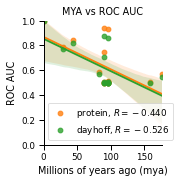

In [56]:
protein_mya_roc_corr = combined_roc_auc_score_dayhoff17_protein8_corr.loc[
    ("protein", "mya"), "score_value"
]
dayhoff_mya_roc_corr = combined_roc_auc_score_dayhoff17_protein8_corr.loc[
    ("dayhoff", "mya"), "score_value"
]

mya_roc_corrs = {"protein": protein_mya_roc_corr, "dayhoff": dayhoff_mya_roc_corr}

g = sns.lmplot(
    data=combined_roc_auc_score_dayhoff17_protein8,
    x="mya",
    y="score_value",
    hue="alphabet",
    palette=dict(protein=protein_color, dayhoff=dayhoff_color),
    hue_order=["protein", "dayhoff"],
    size=2.25,
    legend=False
)
for ax in g.axes.flat:
    h, l = ax.get_legend_handles_labels()
    labels = [f'{x}, $R={mya_roc_corrs[x]:.3f}$' for x in l]
    ax.legend(h, labels)


g.set(title=('MYA vs ROC AUC'), ylabel='ROC AUC', xlabel='Millions of years ago (mya)')
pdf = os.path.join(
    FIGURE_FOLDER,
    f"orpheum_translate__lmplot__mya_vs_roc-auc.pdf",
)
g.set(ylim=(0, 1))
g.savefig(pdf)

In [57]:
pdf

'/home/olga/googledrive/kmer-homology-paper/figures/orpheum_translate__lmplot__mya_vs_roc-auc.pdf'

# SFig 1F

### Number of proteins vs ROC

/home/olga/anaconda/envs/immune-evolution/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


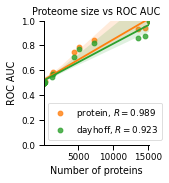

In [58]:
protein_n_proteins_roc_corr = combined_roc_auc_score_dayhoff17_protein8_corr.loc[
    ("protein", "proteome_size"), "score_value"
]
dayhoff_n_proteins_roc_corr = combined_roc_auc_score_dayhoff17_protein8_corr.loc[
    ("dayhoff", "proteome_size"), "score_value"
]

n_proteins_roc_corrs = {"protein": protein_n_proteins_roc_corr, "dayhoff": dayhoff_n_proteins_roc_corr}

g = sns.lmplot(
    data=combined_roc_auc_score_dayhoff17_protein8,
    x="proteome_size",
    y="score_value",
    hue="alphabet",
    palette=dict(protein=protein_color, dayhoff=dayhoff_color),
    hue_order=["protein", "dayhoff"],
    size=2.25,
    legend=False,
)


for ax in g.axes.flat:
    h, l = ax.get_legend_handles_labels()
    labels = [f'{x}, $R={n_proteins_roc_corrs[x]:.3f}$' for x in l]
    ax.legend(h, labels)

g.set(title=('Proteome size vs ROC AUC'), ylabel='ROC AUC', xlabel='Number of proteins')
g.set(ylim=(0, 1))
pdf = os.path.join(
    FIGURE_FOLDER,
    f"orpheum_translate__lmplot__mya_vs_proteome-size.pdf",
)
g.savefig(pdf)

In [2]:
FIGURE_FOLDER

NameError: name 'FIGURE_FOLDER' is not defined

### @paper kmer complexity

In [59]:
kmer_complexity_roc_scores = kmer_complexity.merge(
    combined_roc_auc_score_dayhoff17_protein8[["species", "alphabet", "score_value"]],
    left_on=["common_name", "moltype"],
    right_on=["species", "alphabet"],
)
kmer_complexity_roc_scores.head()

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,moltype,common_name,scientific_name,mya,species,alphabet,score_value
0,tupaia_chinensis,dayhoff6,17,6,6.506573e-10,506371,13.228571,5.704469,-7.524102,dayhoff,tupaia,Tupaia chinensis,82.0,tupaia,dayhoff,0.567616
1,tupaia_chinensis,protein20,8,20,7.144468e-10,518316,10.408240,5.714595,-4.693645,protein,tupaia,Tupaia chinensis,82.0,tupaia,protein,0.586537
2,camelus_bactrianus,dayhoff6,17,6,2.747611e-21,724,13.228571,2.859739,-10.368833,dayhoff,camel,Camelus bactrianus,96.0,camel,dayhoff,0.500095
3,camelus_bactrianus,protein20,8,20,3.197955e-21,752,10.408240,2.876218,-7.532022,protein,camel,Camelus bactrianus,96.0,camel,protein,0.500168
4,mus_musculus,dayhoff6,17,6,7.880357e-06,5443866,13.228571,6.735907,-6.492664,dayhoff,house mouse,Mus musculus,90.0,house mouse,dayhoff,0.872079


In [60]:
kmer_complexity_roc_scores_corr = kmer_complexity_roc_scores.groupby('alphabet')[['score_value', 'n_unique_kmers', 'n_unique_kmers_log10']].corr(method='spearman')
kmer_complexity_roc_scores_corr

score_value  n_unique_kmers  \
alphabet                                                     
dayhoff  score_value              1.000000        0.923633   
         n_unique_kmers           0.923633        1.000000   
         n_unique_kmers_log10     0.923633        1.000000   
protein  score_value              1.000000        0.966976   
         n_unique_kmers           0.966976        1.000000   
         n_unique_kmers_log10     0.966976        1.000000   

                               n_unique_kmers_log10  
alphabet                                             
dayhoff  score_value                       0.923633  
         n_unique_kmers                    1.000000  
         n_unique_kmers_log10              1.000000  
protein  score_value                       0.966976  
         n_unique_kmers                    1.000000  
         n_unique_kmers_log10              1.000000

# SFig 1E

/home/olga/anaconda/envs/immune-evolution/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


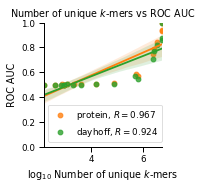

In [61]:
protein_kmer_roc_corr = kmer_complexity_roc_scores_corr.loc[('protein', 'score_value'), 'n_unique_kmers_log10']
dayhoff_kmer_roc_corr = kmer_complexity_roc_scores_corr.loc[('dayhoff', 'score_value'), 'n_unique_kmers_log10']
kmer_roc_corrs = {'protein': protein_kmer_roc_corr, 'dayhoff': dayhoff_kmer_roc_corr}

g = sns.lmplot(
    data=kmer_complexity_roc_scores,
    x="n_unique_kmers_log10",
    y="score_value",
    hue="alphabet",
    palette=dict(protein=protein_color, dayhoff=dayhoff_color),
    hue_order=["protein", "dayhoff"],
    size=2.25,
    legend=False,
)
g.set(title=('Number of unique $k$-mers vs ROC AUC'), xlabel='$\log_{10}$ Number of unique $k$-mers', ylabel='ROC AUC')
for ax in g.axes.flat:
    h, l = ax.get_legend_handles_labels()
    labels = [f'{x}, $R={kmer_roc_corrs[x]:.3f}$' for x in l]
    ax.legend(h, labels)
g.set(ylim=(0, 1))
pdf = os.path.join(
    FIGURE_FOLDER,
    f"orpheum_translate__lmplot__mya_vs_n_unique_kmers.pdf",
)
g.savefig(pdf)

## Concatenate ROC AUC with other metrics

### Combine non-curve sscores

In [62]:
concatenated_metrics = pd.concat([combined_roc_auc_score, combined_metrics], ignore_index=True)
describe(concatenated_metrics)

(7416, 11)
--- First 5 entries ---


,species,alphabet,ksize,score_value,score_name,scientific_lower,scientific_name,mya,proteome_size,proteome,alphabet_ksize
0,baiji,dayhoff,5,0.397805,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8,NaN,NaN
1,baiji,dayhoff,6,0.363173,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8,NaN,NaN
2,baiji,dayhoff,7,0.363950,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8,NaN,NaN
3,baiji,dayhoff,8,0.385517,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8,NaN,NaN
4,baiji,dayhoff,9,0.418185,roc_auc,lipotes_vexillifer,Lipotes vexillifer,96.0,8,NaN,NaN


In [63]:
concatenated_metrics.score_name.value_counts()

f1_score           972
f_12_score         972
accuracy_score     972
f2_score           972
recall_score       972
precision_score    972
jaccard_score      972
roc_auc            612
Name: score_name, dtype: int64

### Write combined metrics to csv!!!

In [64]:
csv = '/mnt/ibm_sm/home/olga/pipeline-results/human-simulated/human_mouse__coding_scores_metrics_concatenated.csv'
concatenated_metrics.to_csv(csv, index=False)


## Read ROC Curve csv

In [65]:
parquet = '/home/olga/data_sm/immune-evolution/pipeline-results/human-simulated/combined-across-species/busco_mammalia_coding_scores_roc_curves.parquet'


combined_roc_curve = pd.read_parquet(parquet)
# Things aren't better at k>21, even with dayhoff
combined_roc_curve = combined_roc_curve.query('ksize <= 21')
combined_roc_curve['proteome'] = combined_roc_curve['species'].map(clean_common_names_of_species).str.replace('_', ' ')
combined_roc_curve = combined_roc_curve.join(
    busco_mammalia_common, on='proteome'
)
combined_roc_curve.head()

,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,proteome,scientific_lower,scientific_name,mya,proteome_size
0,baiji,dayhoff,5,0,0.000000,0.000000,2.000000,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
1,baiji,dayhoff,5,1,0.000820,0.000705,1.000000,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
2,baiji,dayhoff,5,2,0.000820,0.000717,0.977778,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
3,baiji,dayhoff,5,3,0.000825,0.000726,0.977273,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
4,baiji,dayhoff,5,4,0.000842,0.000742,0.976744,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8


In [66]:
sorted(combined_roc_curve['proteome'].unique())

['baiji',
 'bat',
 'camel',
 'chinchilla',
 'common shrew',
 'deer mouse',
 'goat',
 'hedgehog',
 'house mouse',
 'human',
 'koala',
 'macaque',
 'night monkey',
 'platypus',
 'rabbit',
 'rhino',
 'spalax',
 'tupaia']

## Plot ROC curves

### Plot combined roc curves

In [67]:
busco_mammalia_species.sort_values('proteome_size')

,common_name,scientific_name,mya,proteome_size
scientific_lower,,,,
rhinolophus_sinicus,bat,Rhinolophus sinicus,96.0,1
peromyscus_maniculatus_bairdii,deer mouse,Peromyscus Maniculatus bairdii,90.0,1
ceratotherium_simum_simum,rhino,Ceratotherium simum simum,96.0,1
nannospalax_galili,spalax,Nannospalax galili,90.0,3
chinchilla_lanigera,chinchilla,Chinchilla lanigera,90.0,3
camelus_bactrianus,camel,Camelus bactrianus,96.0,4
phascolarctos_cinereus,koala,Phascolarctos cinereus,159.0,6
lipotes_vexillifer,baiji,Lipotes vexillifer,96.0,8
sorex_araneus,common shrew,Sorex araneus,96.0,36


In [68]:
busco_mammalia_species_min_proteome_size = busco_mammalia_species.query('proteome_size >= 2000')
busco_mammalia_species_min_proteome_size

,common_name,scientific_name,mya,proteome_size
scientific_lower,,,,
homo_sapiens,human,Homo sapiens,0.0,15066
macaca_mulatta,macaque,Macaca mulatta,29.4,5008
aotus_nancymaae,night monkey,Aotus nancymaae,43.2,7261
mus_musculus,house mouse,Mus musculus,90.0,14519
oryctolagus_cuniculus,rabbit,Oryctolagus cuniculus,90.0,4424
erinaceus_europaeus,hedgehog,Erinaceus europaeus,96.0,13448


In [69]:
busco_mammalia_species_min_proteome_size.shape

(6, 4)

In [70]:
combined_roc_curve_min_proteome_sizes = combined_roc_curve.query('proteome in @busco_mammalia_species_min_proteome_size.common_name.values')
# combined_roc_curve_min_proteome_sizes['scientific_lower'] = combined_roc_curve_min_proteome_sizes
combined_roc_curve_min_proteome_sizes.shape

combined_roc_curve_min_proteome_sizes.proteome.unique()

array(['hedgehog', 'human', 'macaque', 'house mouse', 'night monkey',
       'rabbit'], dtype=object)

In [71]:
combined_roc_curve_min_proteome_sizes.scientific_name.unique()

array(['Erinaceus europaeus', 'Homo sapiens', 'Macaca mulatta',
       'Mus musculus', 'Aotus nancymaae', 'Oryctolagus cuniculus'],
      dtype=object)

In [72]:
species_order = busco_mammalia_species_min_proteome_size['scientific_name']
species_order

scientific_lower
homo_sapiens                      Homo sapiens
macaca_mulatta                  Macaca mulatta
aotus_nancymaae                Aotus nancymaae
mus_musculus                      Mus musculus
oryctolagus_cuniculus    Oryctolagus cuniculus
erinaceus_europaeus        Erinaceus europaeus
Name: scientific_name, dtype: object

# SFig B,C

dayhoff
protein


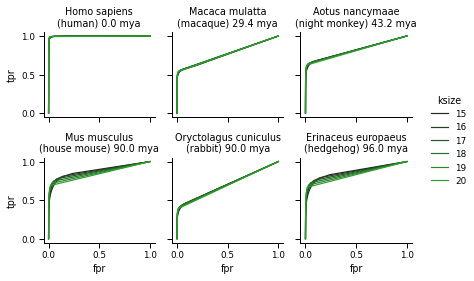

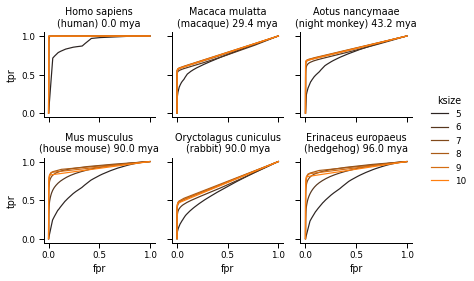

In [73]:
for alphabet, df in combined_roc_curve_min_proteome_sizes.groupby("alphabet"):
    print(alphabet)
    hue_order = alphabet_ksizes[alphabet]
    palette = alphabet_palettes[alphabet]
    g = sns.FacetGrid(
        data=df,  # col='alphabet',
        hue="ksize",
        palette=palette,
        col="scientific_name",
        col_order=species_order,
        col_wrap=3,
        height=2,
        hue_order=hue_order,
    )
    g.map(plt.plot, "fpr", "tpr")
    g.add_legend()
    g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
    g.set_titles("{col_name}")
    
    for ax in g.axes.flat:
        scientific_name = ax.get_title()
        this_species_metadata =  busco_mammalia_species_min_proteome_size.query('scientific_name == @scientific_name')
        common_name = this_species_metadata.common_name.iloc[0]
        mya = this_species_metadata.mya.iloc[0]
        new_title = f'{scientific_name}\n({common_name}) {mya} mya'
        ax.set_title(new_title)
        
    # Save the figure
    pdf = os.path.join(
        FIGURE_FOLDER, f"orpheum_translate__roc_curves_all_proteomes__{alphabet}.pdf"
    )
    g.tight_layout()
    g.savefig(pdf)

### Plot combined roc curves - protein and k=8 only


In [74]:
combined_roc_curve_protein = combined_roc_curve.query(
    '(ksize == 8) and (alphabet == "protein")'
)
print(combined_roc_curve_protein.shape)
combined_roc_curve_protein.head()

(3078, 13)


,species,alphabet,ksize,threshold_i,fpr,tpr,thresholds,score_name,proteome,scientific_lower,scientific_name,mya,proteome_size
4336,baiji,protein,8,0,0.0,0.000000,2.000000,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
4337,baiji,protein,8,1,0.0,0.000009,1.000000,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
4338,baiji,protein,8,2,0.0,0.000018,0.761905,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
4339,baiji,protein,8,3,0.0,0.000024,0.744186,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
4340,baiji,protein,8,4,0.0,0.000033,0.674419,roc_auc,baiji,lipotes_vexillifer,Lipotes vexillifer,96.0,8
